# Visualizations

## Imports

In [1]:
import pandas as pd
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval
import wordcloud
import matplotlib.pyplot as plt

import ipywidgets as widgets
import plotly.subplots as sp
import matplotlib
import ipywidgets as widgets
from IPython.display import clear_output, display
from sklearn import preprocessing
import numpy as np

## Globals

In [2]:
# True when the song should be removed when he contains one of the genres
# False when only the genres of the aritst should be removed
REMOVE_ARTIST = True

# False increases the figure sizes => next cell
NOTEBOOK = True

# Font size in the visualisations
FONT_SIZE = 18

In [3]:
if NOTEBOOK:
    FIG_HEIGHT = 500
    FIG_WIDTH = 1000
else: 
    FIG_HEIGHT = 1200
    FIG_WIDTH = 2000

## Preprocessing

In [4]:
remove_genres = ["classical", "jazz", "folk", "french", "turkish", "gospel", "samba", "piano", "mpb", "sertanejo", "pagode", "sleep", "forro", "malay", "anime", 
                 "j-idol", "comedy", "mandopop", "cantopop", "show-tunes", "emo", "romance", "j-dance", "chill", "world-music", "iranian", "idm", "metalcore", 
                 "hardstyle", "opera", "k-pop", "j-pop", "j-rock", "happy"]

In [5]:
by_isrc = pd.read_csv('data/by_isrc.csv')

In [6]:
by_isrc.shape

(416154, 25)

In [7]:
# there are two songs which have the name "nan". They are interpreted as np.NAN. Since they are not that important they will be removed.
by_isrc = by_isrc[~by_isrc["name"].isna()]

In [8]:
by_isrc.shape

(416152, 25)

In [9]:
chart_power = pd.read_excel('data/chart-power-scores_80s.xlsx')

### Find the biggest genres

In [10]:
by_isrc_sub = by_isrc.copy()
by_isrc_sub = by_isrc_sub[['isrc', 'genres', 'year']]
by_isrc_sub.shape

(416152, 3)

Remove the genres that are not intersting for 80s80s

In [11]:
if REMOVE_ARTIST:
    by_isrc_sub = by_isrc_sub[~by_isrc_sub['genres'].str.contains('|'.join(remove_genres))]
    by_isrc_sub['genres'] = by_isrc_sub['genres'].apply(literal_eval)
    df = by_isrc_sub.copy()
    df.drop(columns='year', inplace=True)
    by_isrc_sub = by_isrc_sub.explode('genres')
else:
    by_isrc_sub['genres'] = by_isrc_sub['genres'].apply(literal_eval)
    by_isrc_sub = by_isrc_sub.explode('genres')
    by_isrc_sub = by_isrc_sub[~by_isrc_sub['genres'].str.fullmatch('|'.join(remove_genres))]
    df = pd.DataFrame(by_isrc_sub.groupby('isrc')['genres'].apply(list))
by_isrc_sub.shape

(404094, 3)

In [12]:
df = df.merge(by_isrc.drop(columns='genres'), how='left', on='isrc')

In [13]:
df.head()

,isrc,genres,name,artists,album,release_date,release_date_precision,uri,spotify_id,chart_power,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,AEA0Q1900049,[pop],asi jina sohneyan,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4gEJ7dAwc67EMzojM8yZW8,4gEJ7dAwc67EMzojM8yZW8,NaN,...,1,0.0718,0.773,0.000004,0.3660,0.857,106.167,326430,4,1989
1,AEA0Q1900050,[pop],oh na ro dil merey tun,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:1sfQm4tPUxutEyX89xBNKd,1sfQm4tPUxutEyX89xBNKd,NaN,...,1,0.0746,0.819,0.000000,0.1260,0.847,127.191,383388,4,1989
2,AEA0Q1900051,[pop],nazaraan tun dur ho kay,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4lynOHGcyNVvReUJ8ivLXr,4lynOHGcyNVvReUJ8ivLXr,NaN,...,1,0.0373,0.677,0.000001,0.0769,0.965,118.307,389803,4,1989
3,AEA0Q1900052,[pop],koyi raawan ch beh (mahiye),akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:5GIYaE4QwbbTxDdI0KfoiX,5GIYaE4QwbbTxDdI0KfoiX,NaN,...,1,0.0502,0.735,0.001930,0.2080,0.791,110.104,724500,4,1989
4,AEA0Q1900053,[pop],ja ni tun khushiyan maaney,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:0T2eReINvdY0aiAko9Tss7,0T2eReINvdY0aiAko9Tss7,NaN,...,1,0.0436,0.777,0.000000,0.1400,0.929,124.521,421667,4,1989


Sort by the biggest genres (released songs)

In [14]:
by_isrc_sub['count'] = 0

In [15]:
top_genres = pd.DataFrame(by_isrc_sub.groupby('genres')['count'].count()).sort_values(by='count', ascending=False)[:20]

In [16]:
top_genres

,count
genres,
pop,92995
rock,75732
punk,21592
metal,14063
country,13476
hard-rock,10377
german,10214
punk-rock,8794
disco,8650


Sort the biggest genres by realeses per year.

In [17]:
top_genres_per_year = pd.crosstab(by_isrc_sub['year'],by_isrc_sub['genres'])

In [18]:
top_genres_per_year[list(top_genres.index)]

genres,pop,rock,punk,metal,country,hard-rock,german,punk-rock,disco,blues,swedish,soul,alternative,alt-rock,synth-pop,british,funk,hardcore,spanish,r-n-b
year,,,,,,,,,,,,,,,,,,,,
1980,9140,6667,2003,694,1340,885,584,907,1263,933,774,1031,516,466,420,553,775,359,295,264
1981,8338,6662,2200,686,1421,805,611,920,1086,806,903,1039,553,533,617,459,739,466,148,302
1982,8666,7031,2271,735,1818,1001,807,807,1170,774,774,1058,417,406,658,732,696,564,441,476
1983,7722,6826,2165,1004,1133,1010,695,838,1127,710,809,772,490,459,673,433,715,569,403,259
1984,9524,6970,2135,1399,982,1099,823,878,766,711,739,663,643,619,833,513,540,613,597,461
1985,9051,7210,2017,1431,1203,1001,815,755,798,458,760,550,652,607,816,332,596,608,686,531
1986,8811,7274,2056,1598,1240,1036,1080,853,603,638,669,542,887,844,724,530,347,529,634,425
1987,9118,8672,2010,2097,1414,1288,1292,905,583,816,795,572,1186,1164,714,727,430,638,756,621
1988,10602,8696,2395,2081,1466,1103,1714,926,618,1059,845,677,1186,1039,533,842,574,814,792,514


## Development of features over the years

The development of the features over the years should be visualized.

In [19]:
def group_songs_by_year(data_frame, genre=None):
    per_year_features = ['year', 'popularity', 'danceability', 'energy',
                     'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'duration_ms',
                     'time_signature']
    per_year_agg = {
        "popularity": 'mean',
        'danceability': 'mean', 
        'energy': 'mean',
        'key': 'mean', 
        'loudness': 'mean', 
        'mode': 'mean', 
        'speechiness': 'mean',
        'acousticness': 'mean', 
        'instrumentalness': 'mean', 
        'liveness': 'mean',
        'valence': 'mean', 
        'tempo': 'mean', 
        'duration_ms': 'mean',
        'time_signature': 'mean',
        'count': 'count'
    }
    df = data_frame.copy()
    if genre:
        df = df.explode('genres')
        df = df[df["genres"] == genre]
    df = df[per_year_features]
    df['count'] = -1
    df = df.groupby("year").agg(per_year_agg)
    df.reset_index(inplace=True)
    df['duration_min'] = df['duration_ms'] / (1000 * 60)
    df = df.astype({'year': str})

    pct_df = pd.DataFrame()
    for feature in df.columns:
        if feature != "year":
            pct_df[feature] = round(df[feature].pct_change() * 100,2)
        else:
            pct_df[feature] = df[feature]
    pct_df = pct_df.fillna(0)
    pct_df.set_index("year", inplace=True)
    pct_df = pct_df.applymap(lambda x: str(x) + '%' if x < 0 else '+' + str(x) + '%')
    return df, pct_df

In [20]:
songs_per_year, songs_per_year_pct = group_songs_by_year(df)
songs_per_year_rock, songs_per_year_rock_pct = group_songs_by_year(df, "rock")
songs_per_year_pop, songs_per_year_pop_pct = group_songs_by_year(df, "pop")

In [21]:
songs_per_year_pct

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,count,duration_min
year,,,,,,,,,,,,,,,,
1980,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%,+0.0%
1981,+2.32%,+1.35%,+1.27%,+0.82%,+0.36%,-0.38%,+3.71%,-4.34%,+7.45%,-0.14%,-0.26%,+0.46%,-2.29%,+0.3%,-6.58%,-2.29%
1982,+0.21%,+1.1%,-1.12%,+0.85%,+0.83%,-0.63%,-0.25%,+2.46%,-4.0%,-0.53%,-0.06%,-0.87%,+1.86%,-0.11%,+10.38%,+1.86%
1983,+5.04%,-0.73%,+2.07%,-0.09%,-0.18%,-1.77%,-0.95%,-8.16%,+13.69%,-0.57%,-2.44%,+0.29%,+1.86%,+0.31%,-9.81%,+1.86%
1984,+2.41%,-0.68%,+0.59%,+0.82%,+0.65%,-3.13%,-4.43%,+1.88%,-7.2%,+1.09%,-1.53%,-0.25%,-1.09%,-0.03%,+12.04%,-1.09%
1985,-0.73%,-0.44%,+1.17%,-0.45%,+0.01%,+2.33%,-5.27%,-1.36%,-0.54%,-1.05%,-0.16%,-0.3%,+2.68%,-0.03%,-4.86%,+2.68%
1986,-0.4%,-1.71%,-1.21%,-0.17%,+3.31%,+0.46%,+7.9%,+1.78%,+6.14%,-3.11%,-2.63%,-0.3%,-0.19%,-0.25%,+5.6%,-0.19%
1987,+0.37%,+0.07%,+0.55%,-0.02%,+1.26%,+1.6%,+0.35%,-3.0%,+8.13%,+0.22%,-1.01%,+0.12%,-1.17%,+0.09%,+13.21%,-1.17%
1988,-4.82%,+0.58%,-0.19%,+0.44%,+1.54%,-1.01%,-1.24%,-0.91%,+1.14%,+0.7%,+1.87%,-0.55%,+0.19%,-0.17%,+11.73%,+0.19%


In [22]:
if not NOTEBOOK:
    features = ["danceability", "energy", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
    spys = [
        {"title": "Development of features for all genres", "data": songs_per_year, "pct": songs_per_year_pct},
        {"title": "Development of features for genre rock", "data": songs_per_year_rock, "pct": songs_per_year_rock_pct},
        {"title": "Development of features for genre pop", "data": songs_per_year_pop, "pct": songs_per_year_pop_pct}
    ]
    
    for spy in spys:
        fig = go.Figure()
        
        for feature in features:
            if feature == "danceability":
                tp="bottom center"
            else:
                tp='top center'
            fig.add_trace(go.Scatter(
            x=spy['data']['year'],
            y=spy['data'][feature],
            name=feature,
            mode="markers+text+lines",
            text=spy['pct'][feature],
            textposition=tp
        ))
        
        fig.update_layout(
            height = FIG_HEIGHT,
            width = FIG_WIDTH,
            #yaxis_title='Popularity',
            xaxis_title='year',
            title=spy["title"],
            template='plotly_dark',
            yaxis_range=[0,1]
        )
        
        fig.show()

In [23]:
if not NOTEBOOK:
    features = [
        {
            "title": "Tempo (bpm)",
            "value": "tempo",
            "range": [110, 130]
        },
        {
            "title": "Duration (min)",
            "value": "duration_min",
            "range": [3, 5]
        },
        {
            "title": "Loudness (dB)",
            "value": "loudness",
            "range": [0, -20]
        },
        {
            "title": "Songs released",
            "value": "count",
            "range": [0, 50000]
        }
    ]
    for feature in features:
        fig = go.Figure()
        
        fig.add_trace(go.Scatter(
            x=songs_per_year['year'],
            y=songs_per_year[feature["value"]],
            #name=feature["value"]
            name='all',
            #mode="markers+text+lines",
            #text=songs_per_year_pct[feature["value"]],
            #textposition='top center'
        ))

        fig.add_trace(go.Scatter(
            x=songs_per_year_rock['year'],
            y=songs_per_year_rock[feature["value"]],
            #name=feature["value"]
            name='rock',
            #mode="markers+text+lines",
            #text=songs_per_year_rock_pct[feature["value"]],
            #textposition='top center'
        ))

        fig.add_trace(go.Scatter(
            x=songs_per_year_pop['year'],
            y=songs_per_year_pop[feature["value"]],
            #name=feature["value"]
            name='pop',
            #mode="markers+text+lines",
            #text=songs_per_year_pop_pct[feature["value"]],
            #textposition='bottom center'
        ))
        
        fig.update_layout(
            font_size=FONT_SIZE,
            height = FIG_HEIGHT,
            width = FIG_WIDTH,
            yaxis_title=feature["title"],
            xaxis_title='year',
            title='Development of features',
            template='plotly_dark',
            yaxis_range=feature["range"]
        )
        
        fig.show()

In [24]:
if NOTEBOOK:
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=songs_per_year['year'],
        y=songs_per_year['popularity'],
        name='Duration (ms)'
    ))
    
    # Define the dropdown menu options
    dropdown_options = [
        {'label': 'Popularity', 'value': 'popularity', 'range': [0,10]},
        {'label': 'Danceability', 'value': 'danceability', 'range': [0,1]},
        {'label': 'Energy', 'value': 'energy', 'range': [0,1]},
        {'label': 'Loudness', 'value': 'loudness', 'range': [0,-20]},
        {'label': 'Mode', 'value': 'mode', 'range': [0,1]},
        {'label': 'Speechiness', 'value': 'speechiness', 'range': [0,1]},
        {'label': 'Acousticness', 'value': 'acousticness', 'range': [0,1]},
        {'label': 'Instrumentalness', 'value': 'instrumentalness', 'range': [0,1]},
        {'label': 'Liveness', 'value': 'liveness', 'range': [0,1]},
        {'label': 'Valence', 'value': 'valence', 'range': [0,1]},
        {'label': 'Tempo', 'value': 'tempo', 'range': [100, 130]},
        {'label': 'Time Signature', 'value': 'time_signature', 'range': [3,7]},
        {'label': 'Count', 'value': 'count', 'range': [0,50000]},
        {'label': 'Duration (min)', 'value': 'duration_min', 'range': [3,5]}
    ]
    
    # Create the dropdown menu
    dropdown_menu = go.layout.Updatemenu(
        buttons=list([
            dict(
                args=[
                    {'y': [songs_per_year[option['value']]]}, 
                    {'yaxis': {
                        'title': option['label'].capitalize(),
                        'range': option['range']
                    }}
                ],
                label=option['label'],
                method='update'
            )
            for option in dropdown_options
        ]),
        direction='down',
        showactive=True,
    )
    
    fig.update_layout(
        font_size=FONT_SIZE,
        height = FIG_HEIGHT,
        width = FIG_WIDTH,
        updatemenus=[dropdown_menu],
        yaxis_title='Popularity',
        xaxis_title='year',
        title='Development of features',
        template='plotly_dark',
        yaxis_range=[0,10]
    )
    
    fig.show()

## Development of genres over the years

The development of the genres over the years should be visualized.

In [25]:
features = list(top_genres.index)[:10]

In [26]:
dev_genres_df = top_genres_per_year.reset_index()

In [27]:
fig = go.Figure()

for feature in features:
    fig.add_trace(
        go.Scatter(
            x=dev_genres_df['year'],
            y=dev_genres_df[feature],
            name=feature
        )
    )
    
fig.update_layout(
    font_size=FONT_SIZE,
    height = FIG_HEIGHT,
    width = FIG_WIDTH,
    #updatemenus=[dropdown_menu],
    yaxis_title='Songs released',
    xaxis_title='year',
    title='Development of genres',
    template='plotly_dark',
    yaxis_rangemode='tozero'
)

fig.show()

In [28]:
# Create the initial scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dev_genres_df['year'],
    y=dev_genres_df['pop'],
    #mode='markers',
    name='Pop'
))

# Create the dropdown menu
dropdown_menu = go.layout.Updatemenu(
    buttons=list([
        dict(
            args=[
                {'y': [dev_genres_df[option]]}, 
                {'yaxis': {
                    'title': option.capitalize(),
                    'rangemode':'tozero'
                }}
            ],
            label=option,
            method='update'
        )
        for option in features
    ]),
    direction='down',
    showactive=True,
)

# Update the layout with dropdown menu and initial y-axis title
fig.update_layout(
    font_size=FONT_SIZE,
    height = FIG_HEIGHT,
    width = FIG_WIDTH,
    updatemenus=[dropdown_menu],
    yaxis_title='pop',
    xaxis_title='year',
    title='Development of genres',
    template='plotly_dark',
    yaxis_rangemode='tozero'
)

fig.show()

## Add the genres to the features

In [29]:
df.head()

,isrc,genres,name,artists,album,release_date,release_date_precision,uri,spotify_id,chart_power,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,AEA0Q1900049,[pop],asi jina sohneyan,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4gEJ7dAwc67EMzojM8yZW8,4gEJ7dAwc67EMzojM8yZW8,NaN,...,1,0.0718,0.773,0.000004,0.3660,0.857,106.167,326430,4,1989
1,AEA0Q1900050,[pop],oh na ro dil merey tun,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:1sfQm4tPUxutEyX89xBNKd,1sfQm4tPUxutEyX89xBNKd,NaN,...,1,0.0746,0.819,0.000000,0.1260,0.847,127.191,383388,4,1989
2,AEA0Q1900051,[pop],nazaraan tun dur ho kay,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4lynOHGcyNVvReUJ8ivLXr,4lynOHGcyNVvReUJ8ivLXr,NaN,...,1,0.0373,0.677,0.000001,0.0769,0.965,118.307,389803,4,1989
3,AEA0Q1900052,[pop],koyi raawan ch beh (mahiye),akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:5GIYaE4QwbbTxDdI0KfoiX,5GIYaE4QwbbTxDdI0KfoiX,NaN,...,1,0.0502,0.735,0.001930,0.2080,0.791,110.104,724500,4,1989
4,AEA0Q1900053,[pop],ja ni tun khushiyan maaney,akram rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:0T2eReINvdY0aiAko9Tss7,0T2eReINvdY0aiAko9Tss7,NaN,...,1,0.0436,0.777,0.000000,0.1400,0.929,124.521,421667,4,1989


In [30]:
scaler = MinMaxScaler()
df_top_genres_features = df.copy()
df_top_genres_features = df_top_genres_features[['danceability', 'energy',
                       'key', 'loudness', 'mode', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'time_signature', 'tempo', 'genres']]
df_top_genres_features = df_top_genres_features.explode('genres')
df_top_genres_features.set_index('genres', inplace=True)
df_top_genres_features = pd.DataFrame(scaler.fit_transform(df_top_genres_features),
                                     columns = df_top_genres_features.columns,
                                     index = df_top_genres_features.index)
df_top_genres_features.reset_index(inplace=True)
df_top_genres_features = df_top_genres_features.groupby('genres').mean()
df_top_genres_features = df_top_genres_features.loc[df_top_genres_features.index.str.fullmatch('|'.join(features))]

In [31]:
df_top_genres_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,tempo
genres,,,,,,,,,,,,
blues,0.548265,0.571817,0.472293,0.733599,0.755728,0.067434,0.348687,0.099424,0.251105,0.634823,0.765895,0.508360
country,0.579631,0.466716,0.463396,0.718850,0.912214,0.048277,0.444087,0.026841,0.211640,0.599559,0.771980,0.486278
disco,0.716476,0.654678,0.495218,0.758398,0.568902,0.060990,0.184301,0.089785,0.171451,0.741115,0.794289,0.480022
german,0.459345,0.450599,0.481122,0.660392,0.686509,0.129203,0.539556,0.272386,0.218766,0.434567,0.760623,0.465617
hard-rock,0.423676,0.807770,0.492199,0.787642,0.667919,0.071841,0.070428,0.131336,0.320655,0.466943,0.789997,0.517088
metal,0.384719,0.833908,0.497152,0.790120,0.621347,0.081077,0.049012,0.187965,0.287595,0.398810,0.789149,0.512083
pop,0.562623,0.549550,0.469055,0.752334,0.693919,0.059194,0.449759,0.050969,0.219852,0.602897,0.773405,0.490385
punk,0.435376,0.780995,0.490695,0.779186,0.680622,0.082295,0.105443,0.196370,0.260262,0.522139,0.787338,0.525670
punk-rock,0.466842,0.764908,0.491120,0.775738,0.687514,0.075263,0.114855,0.195468,0.263788,0.551331,0.788970,0.528091


## Create Radar Chart for the top 10 genres

In [32]:
top_genres_list = list(top_genres.index)[:10]
#top_genres_list.append(top_genres_list[0])

In [33]:
fig = go.Figure()

for genre in top_genres_list:
    df_radar = pd.DataFrame(df_top_genres_features.loc[genre])
    df_radar.reset_index(inplace=True)
    df_radar.rename(columns={"index":"feature", genre: "mean"}, inplace=True)
    df_radar = pd.concat([df_radar, pd.DataFrame(df_radar.iloc[0]).T])
    
    fig.add_trace(go.Scatterpolar(
        r = df_radar['mean'],
        theta = df_radar['feature'],
        mode = 'lines',
        fill = 'none',
        name = genre
    ))
fig.update_layout(
    font_size=FONT_SIZE,
    height = FIG_HEIGHT,
    width = FIG_WIDTH,
    template='plotly_dark',
    title="Audiofeatures of the top 10 genres"
)

fig.show()

## Word Cloud for Genres

In [34]:
genre_counts = top_genres.reset_index()

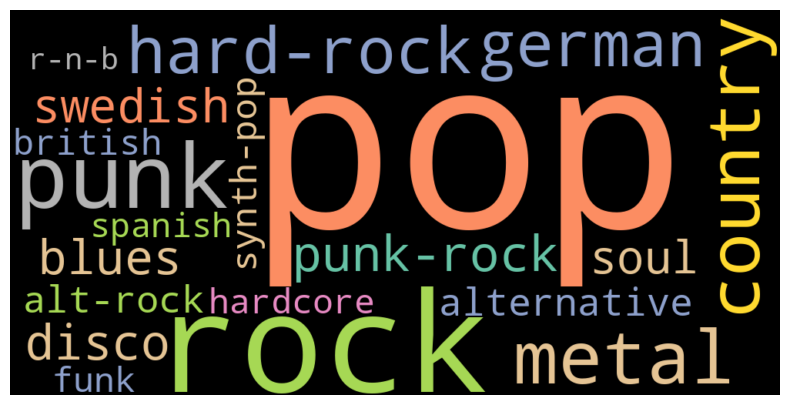

In [35]:
genre_counts = genre_counts.sort_values(by='count', ascending=False)
genre_counts_dict = genre_counts.set_index('genres')['count'].to_dict()
cloud = wordcloud.WordCloud(height = FIG_HEIGHT, width = FIG_WIDTH, background_color='black',colormap='Set2').generate_from_frequencies(genre_counts_dict)
cloud.to_file('top_20_genres.png')
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Cloud for Genres per Year

There are several null values after pivot the dataframe, because some genres doesn't exist in some years. But it doesn't matter for our purpose

In [36]:
genres_by_year = top_genres_per_year.copy()

In [37]:
genres_by_year = genres_by_year.to_dict('index')

In [38]:
def wc(df):
    clear_output(wait=True)
    cloud = wordcloud.WordCloud(width=FIG_WIDTH, height=FIG_HEIGHT, background_color='black').generate_from_frequencies(df)
    plt.figure(figsize=(9, 9))
    plt.imshow(cloud)
    plt.tight_layout()
    plt.axis("off")

In [39]:
dropdown = widgets.Dropdown(options = genres_by_year,
                                value=genres_by_year[1980],
                                 description= "year" )

widgets.interact(wc,df=dropdown)

interactive(children=(Dropdown(description='year', options={1980: {'acoustic': 55, 'afrobeat': 30, 'alt-rock':…

<function __main__.wc(df)>

## Chart power of Artists in Word Cloud

split artists

In [40]:
df_artists = df.copy()
df_artists = df_artists.drop_duplicates(["name","year"])

In [41]:
print('Occurences of substring ", ": ' + str(len(df_artists.loc[df_artists["artists"].str.contains(', ')])))
print('Occurences of substring "_":' + str(len(df_artists.loc[df_artists["artists"].str.contains('_')])))

Occurences of substring ", ": 348
Occurences of substring "_":0


In [42]:
df_artists.loc[df_artists["artists"].str.contains(', '), 'artists'] = df_artists[df_artists["artists"].str.contains(', ')]['artists'].str.replace(', ', '_')

In [43]:
print('Occurences of substring ", ": ' + str(len(df_artists.loc[df_artists["artists"].str.contains(', ')])))
print('Occurences of substring "_":' + str(len(df_artists.loc[df_artists["artists"].str.contains('_')])))

Occurences of substring ", ": 0
Occurences of substring "_":348


In [44]:
df_artists['artists'] = df_artists['artists'].str.split(',')
df_split_artists = df_artists.explode('artists')

In [45]:
print('Occurences of substring ", ": ' + str(len(df_split_artists.loc[df_split_artists["artists"].str.contains(', ')])))
print('Occurences of substring "_":' + str(len(df_split_artists.loc[df_split_artists["artists"].str.contains('_')])))

Occurences of substring ", ": 0
Occurences of substring "_":348


In [46]:
df_split_artists.loc[df_split_artists['artists'].str.contains('_'), 'artists'] = df_split_artists[df_split_artists["artists"].str.contains('_')]['artists'].str.replace('_', ', ')

In [47]:
print('Occurences of substring ", ": ' + str(len(df_split_artists.loc[df_split_artists["artists"].str.contains(', ')])))
print('Occurences of substring "_":' + str(len(df_split_artists.loc[df_split_artists["artists"].str.contains('_')])))

Occurences of substring ", ": 348
Occurences of substring "_":0


In [48]:
df_split_artists["artists"].unique()

array(['akram rahi', 'walid toufic',
       'patricio rey y sus redonditos de ricota', ..., 'ava',
       'fereydun shahbazian', 'mohammad-reza shajarian'], dtype=object)

In [49]:
df_artist_chart_power_per_year = (
    df_split_artists.groupby(['year', 'artists'])
    .agg({'chart_power': 'sum'})
    .groupby('year', as_index=False)
    .apply(lambda group: group.nlargest(15, columns='chart_power'))
    .reset_index(level=0, drop=True)
    .reset_index()
    .pivot(index='year', columns='artists', values='chart_power')
    .fillna(0)
    .astype(float)
    .to_dict(orient='index')
)

In [50]:
dropdown = widgets.Dropdown(options = df_artist_chart_power_per_year,
                                value=df_artist_chart_power_per_year[1980],
                                 description= "year" )

widgets.interact(wc,df=dropdown)

interactive(children=(Dropdown(description='year', options={1980: {'a-ha': 0.0, 'abba': 5044.0, 'ac/dc': 1920.…

<function __main__.wc(df)>

## Chart Power of Artists in Word Cloud (All years)

In [51]:
df_chart_power_artists = df_split_artists.copy()

sum of chart score per artists

In [52]:
df_chart_power_artists = df_chart_power_artists.groupby("artists")["chart_power"].sum().reset_index()

Top 20 Chart Score Artists in Word Cloud

In [53]:
top20_chart = df_chart_power_artists.sort_values(['chart_power'],ascending=False).head(20)

In [54]:
def wordcloud_artists(counts, file=None):
    cloud = wordcloud.WordCloud(width=FIG_WIDTH, height=FIG_HEIGHT, background_color='black').generate_from_frequencies(counts)
    if file:
        cloud.to_file(file)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

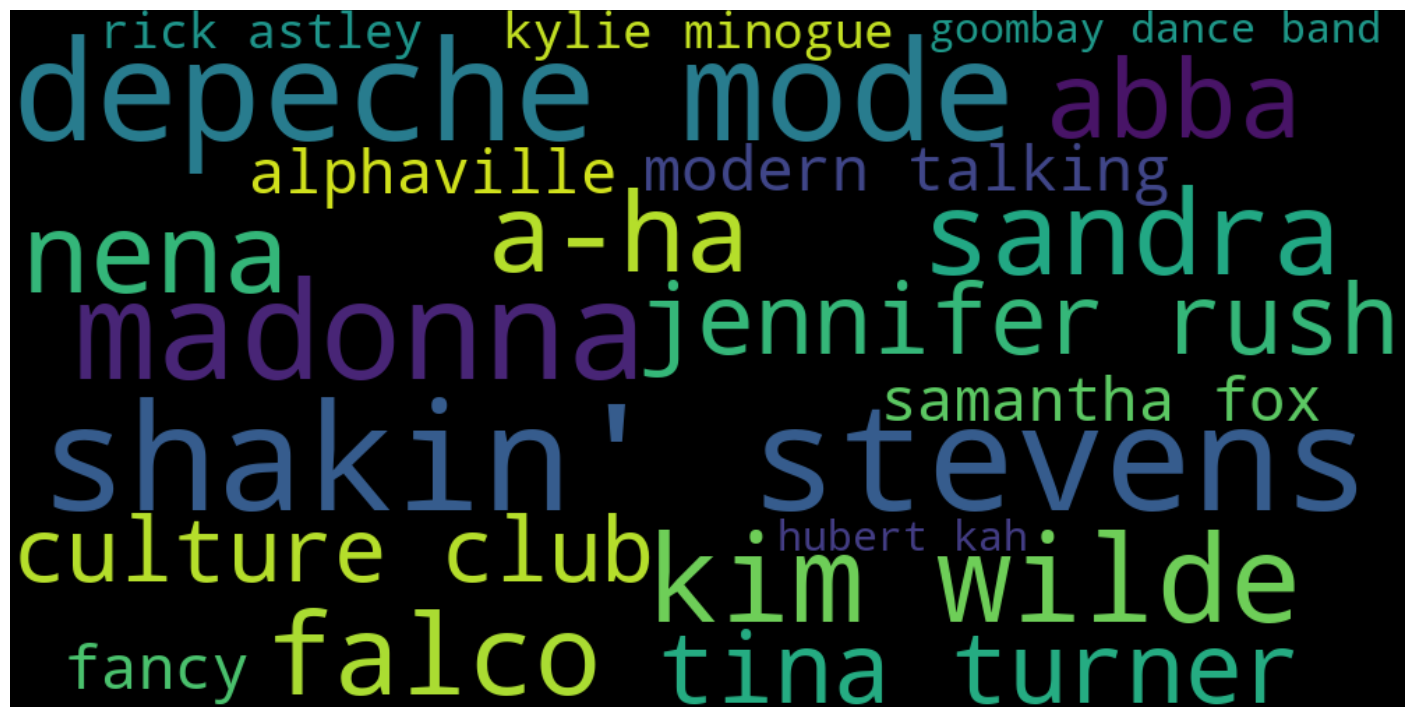

In [55]:
top20_chart_tuples = [tuple(x) for x in top20_chart.values]
wordcloud_artists(dict(top20_chart_tuples), 'top_20_artists_chart_power.png')

## Popularity of Artists in Word Cloud (All years)

In [56]:
df_popularity_artists = df_split_artists.groupby("artists", as_index=False)["popularity"].sum()

In [57]:
top20 = df_popularity_artists.sort_values(['popularity'],ascending=False).head(20)

In [58]:
top20

,artists,popularity
8260,metallica,7786
12797,the smiths,5753
13367,u2,5465
12386,the cure,5436
3833,fleetwood mac,4865
10079,r.e.m.,4731
2848,depeche mode,4660
3194,duran duran,4474
1626,bruce springsteen,4299
12078,talking heads,4128


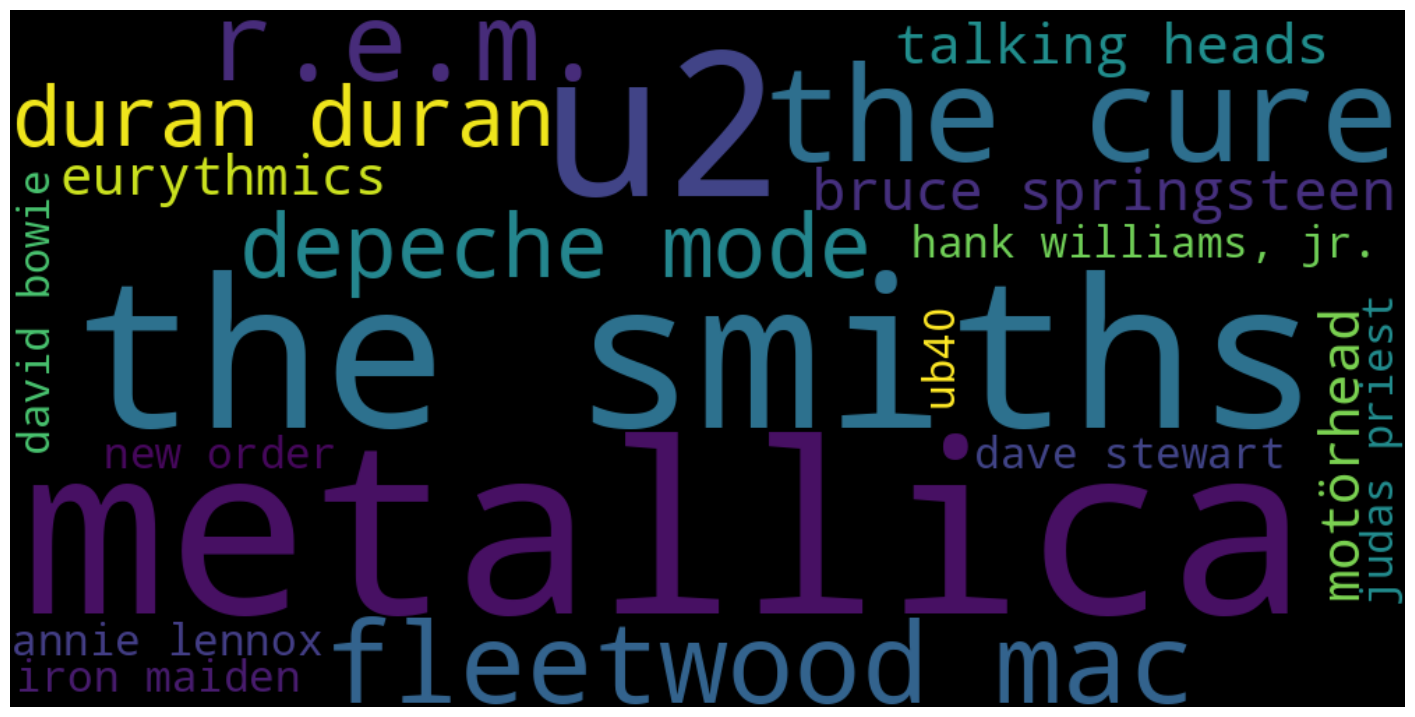

In [59]:
top20_tuples = [tuple(x) for x in top20.values]
wordcloud_artists(dict(top20_tuples), 'top_20_artists_popularity.png')

## Comparison of Chart Power and Popularity for Artists

Merge popularity and chart score

In [60]:
df_comparison = df_popularity_artists.merge(df_chart_power_artists, on='artists',how="left")
df_comparison['popularity'] = df_comparison['popularity'].fillna(0) #fill nan value to 0
df_comparison['chart_power'] = df_comparison['chart_power'].fillna(0)

In [61]:
df_comparison.set_index('artists', inplace=True)

In [62]:
scaler = MinMaxScaler()
df_comparison_sc = pd.DataFrame(
    scaler.fit_transform(df_comparison),
    columns = df_comparison.columns,
    index = df_comparison.index
)

In [63]:
df_comparison_sc.describe()

,popularity,chart_power
count,14260.000000,14260.000000
mean,0.018276,0.002909
std,0.047512,0.028616
min,0.000000,0.000000
25%,0.000128,0.000000
50%,0.002183,0.000000
75%,0.014513,0.000000
max,1.000000,1.000000


In [64]:
df_comparison['p_minus_c'] = df_comparison_sc['popularity'] - df_comparison_sc['chart_power']
df_comparison['c_minus_p'] = df_comparison_sc['chart_power'] - df_comparison_sc['popularity']

In [65]:
df_comparison.head()

,popularity,chart_power,p_minus_c,c_minus_p
artists,,,,
"""colacho"" méndoza y su acordeón",10,0.0,0.001284,-0.001284
'om' alec khaoli,1,0.0,0.000128,-0.000128
'til tuesday,679,0.0,0.087208,-0.087208
*nsync,11,0.0,0.001413,-0.001413
000 maniacs,911,0.0,0.117005,-0.117005


In [66]:
fig = px.scatter(df_comparison, x='popularity', y='chart_power', hover_data=[df_comparison.index])
fig.update_layout(
    font_size=FONT_SIZE,
    height = 500,
    #width = FIG_WIDTH,
    template='plotly_dark',
    title="Chart power vs popularity"
)
fig.show()

### Top 20 popular Artists today vs. in the 80s

In [67]:
top20_popu = df_comparison.nlargest(20, 'popularity').reset_index()
top20_score = df_comparison.nlargest(20, 'chart_power').reset_index()

In [68]:
display(top20_popu, top20_score)

,artists,popularity,chart_power,p_minus_c,c_minus_p
0,metallica,7786,0.0,1.000000,-1.000000
1,the smiths,5753,0.0,0.738890,-0.738890
2,u2,5465,919.0,0.642515,-0.642515
3,the cure,5436,0.0,0.698176,-0.698176
4,fleetwood mac,4865,2583.0,0.457925,-0.457925
5,r.e.m.,4731,0.0,0.607629,-0.607629
6,depeche mode,4660,13828.0,-0.295060,0.295060
7,duran duran,4474,5465.0,0.221471,-0.221471
8,bruce springsteen,4299,1927.0,0.427621,-0.427621
9,talking heads,4128,0.0,0.530182,-0.530182


,artists,popularity,chart_power,p_minus_c,c_minus_p
0,shakin' stevens,1947,15475.0,-0.749936,0.749936
1,depeche mode,4660,13828.0,-0.295060,0.295060
2,madonna,2273,13295.0,-0.567193,0.567193
3,kim wilde,2074,10246.0,-0.395725,0.395725
4,sandra,940,9584.0,-0.498592,0.498592
5,falco,1610,8702.0,-0.355545,0.355545
6,nena,1400,8600.0,-0.375925,0.375925
7,a-ha,2994,8365.0,-0.156013,0.156013
8,abba,1737,7989.0,-0.293159,0.293159
9,jennifer rush,973,6949.0,-0.324079,0.324079


In [69]:
def print_top_20(df_pop, df_chart, y_type, type):
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Top 20 ' + type + ' in the 80s (chart power)', 'Top 20 ' + type + ' at the moment (popularity)'))

    # Add bar trace for top chart score artists
    fig.add_trace(go.Bar(x=df_chart['chart_power'], y=df_chart[y_type],
                         orientation='h', name='Chart Score'), row=1, col=2)
    
    # Add bar trace for top popularity artists
    fig.add_trace(go.Bar(x=df_pop['popularity'], y=df_pop[y_type],
                         orientation='h', name='Popularity'), row=1, col=1)
    
    
    
    # Update layout
    fig.update_layout(#title='Top 20 Artists',
                      font_size=FONT_SIZE,
                      yaxis=dict(autorange="reversed"),
                      yaxis2=dict(autorange="reversed"),
                      width=FIG_WIDTH,  # Width in pixels
                      height=FIG_HEIGHT,
                      template='plotly_dark',
                      xaxis=dict(
                          domain=[0.55 ,1],
                          range=[0, 1.25 * df_pop['popularity'].max()],
                          title="Popularity (acc)"
                          
                      ),
                      xaxis2=dict(
                          domain=[0,0.45],
                          range=[0, 1.25 * df_chart['chart_power'].max()],
                          title="Chart power (acc)"
                      )
                      
    )
    
    # Show the plot
    fig.show()

In [70]:
print_top_20(top20_popu, top20_score, 'artists', 'artists')

### Top artists that were unpopular in the 80s but are popular today

In [71]:
def plot_differences(df, x1, range_x1, x2, range_x2, y, title):
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=df[x1],
        y=df[y],
        name=x1,
        orientation='h',
    ))
    
    fig.add_trace(go.Bar(
        x=df[x2],
        y=df[y],
        name=x2,
        orientation='h',
        xaxis='x2', 
    ))
    
    # Set the layout
    fig.update_layout(
        font_size=FONT_SIZE,
        width=FIG_WIDTH,  
        height=FIG_HEIGHT,
        template='plotly_dark',
        barmode='group',
        xaxis=dict(
            title=x1,
            domain=[0,0.5], 
            #autorange='reversed',
            range=range_x1
        ),
        xaxis2=dict(
            title=x2,
            domain=[0.5, 1],  
            range=range_x2
        ),
        yaxis=dict(
            title=y,
            tickmode='array',
            tickvals=df[y],
            ticktext=df[y],
            autorange='reversed'
        ),
        title=title
    )
    
    # Show the plot
    fig.show()

In [72]:
low_chart_power = df_comparison[df_comparison['chart_power'] < 50]
sorted_low_chart_power = low_chart_power.sort_values(by='popularity', ascending=False)
top_10_low_chart = sorted_low_chart_power.head(10)
top_10_low_chart

,popularity,chart_power,p_minus_c,c_minus_p
artists,,,,
metallica,7786,0.0,1.000000,-1.000000
the smiths,5753,0.0,0.738890,-0.738890
the cure,5436,0.0,0.698176,-0.698176
r.e.m.,4731,0.0,0.607629,-0.607629
talking heads,4128,0.0,0.530182,-0.530182
motörhead,3946,0.0,0.506807,-0.506807
"hank williams, jr.",3935,0.0,0.505394,-0.505394
dave stewart,3788,0.0,0.486514,-0.486514
annie lennox,3788,0.0,0.486514,-0.486514


In [73]:
top_10_low_chart = df_comparison[df_comparison['chart_power'] < 50].sort_values('p_minus_c', ascending=False)[:10]

In [74]:
top_10_low_chart.reset_index(inplace=True)

In [75]:
top_10_low_chart

,artists,popularity,chart_power,p_minus_c,c_minus_p
0,metallica,7786,0.0,1.000000,-1.000000
1,the smiths,5753,0.0,0.738890,-0.738890
2,the cure,5436,0.0,0.698176,-0.698176
3,r.e.m.,4731,0.0,0.607629,-0.607629
4,talking heads,4128,0.0,0.530182,-0.530182
5,motörhead,3946,0.0,0.506807,-0.506807
6,"hank williams, jr.",3935,0.0,0.505394,-0.505394
7,dave stewart,3788,0.0,0.486514,-0.486514
8,annie lennox,3788,0.0,0.486514,-0.486514
9,iron maiden,3778,0.0,0.485230,-0.485230


In [76]:
cp_max = df_comparison.chart_power.max()
pop_max = df_comparison.popularity.max()
plot_differences(top_10_low_chart, 'chart_power', [cp_max + 1, 0], 'popularity', [0, pop_max], 'artists', 'Top artists with high popularity but low chart power')

### Top artists that were popular in the 80s but are unpopular today

In [77]:
df_comparison.sort_values('c_minus_p', ascending=False)[:10]

,popularity,chart_power,p_minus_c,c_minus_p
artists,,,,
shakin' stevens,1947,15475.0,-0.749936,0.749936
madonna,2273,13295.0,-0.567193,0.567193
sandra,940,9584.0,-0.498592,0.498592
kim wilde,2074,10246.0,-0.395725,0.395725
nena,1400,8600.0,-0.375925,0.375925
falco,1610,8702.0,-0.355545,0.355545
jennifer rush,973,6949.0,-0.324079,0.324079
hubert kah,560,5717.0,-0.297511,0.297511
depeche mode,4660,13828.0,-0.295060,0.295060


In [78]:
top_10_low_pop = df_comparison[df_comparison['popularity'] < 500].sort_values('c_minus_p', ascending=False)[:20]
top_10_low_pop.reset_index(inplace=True)

In [79]:
top_10_low_pop

,artists,popularity,chart_power,p_minus_c,c_minus_p
0,spider murphy gang,311,4501.0,-0.250913,0.250913
1,karat,218,3832.0,-0.219626,0.219626
2,holly johnson,188,3709.0,-0.215531,0.215531
3,inner city,314,3727.0,-0.200511,0.200511
4,neneh cherry,293,3638.0,-0.197457,0.197457
5,visage,463,3864.0,-0.190227,0.190227
6,den harrow,319,3481.0,-0.183972,0.183972
7,chilly,79,2856.0,-0.174409,0.174409
8,p. lion,46,2695.0,-0.168244,0.168244
9,spliff,295,2920.0,-0.150803,0.150803


In [80]:
cp_max = df_comparison.chart_power.max()
pop_max = df_comparison.popularity.max()
plot_differences(top_10_low_pop, 'chart_power', [cp_max + 1, 0], 'popularity', [0, pop_max], 'artists', 'Top artists with high chart power but low popularity')

## Comparison of Chart Power and Popularity for Songs

Find the most popular songs

In [81]:
tracks = df[["name","popularity",'chart_power']].copy()
tracks = tracks.sort_values('popularity',ascending=False).drop_duplicates(["name"],keep="first") 

In [82]:
tracks['popularity'] = tracks['popularity'].fillna(0) #fill nan value to 0
tracks['chart_power'] = tracks['chart_power'].fillna(0) #fill nan value to 0

In [83]:
tracks.set_index('name', inplace=True)

In [84]:
scaler = MinMaxScaler()
tracks_sc = pd.DataFrame(
    scaler.fit_transform(tracks),
    columns = tracks.columns,
    index = tracks.index
)

In [85]:
tracks['p_minus_c'] = tracks_sc['popularity'] - tracks_sc['chart_power']
tracks['c_minus_p'] = tracks_sc['chart_power'] - tracks_sc['popularity']

In [86]:
tracks.reset_index(inplace=True)

In [87]:
top20_tracks_popularity = tracks.nlargest(20, 'popularity')

Top10 Songs from Chart Score

In [88]:
top20_tracks_chart = tracks.nlargest(20, 'chart_power')
top20_tracks_chart

,name,popularity,chart_power,p_minus_c,c_minus_p
1087,sun of jamaica,58,3255.0,-0.333333,0.333333
721,johnny and mary,61,3157.0,-0.268743,0.268743
720,skandal im sperrbezirk,61,2617.0,-0.102844,0.102844
219,kids in america,70,2586.0,0.010128,-0.010128
508,fade to grey,64,2518.0,-0.037947,0.037947
34943,down under,19,2488.0,-0.545972,0.545972
779,nur geträumt,60,2479.0,-0.071942,0.071942
139,super trouper,73,2469.0,0.080555,-0.080555
5306,"marie, marie",42,2408.0,-0.257026,0.257026
521,der kommissar,64,2394.0,0.000148,-0.000148


In [89]:
print_top_20(top20_tracks_popularity, top20_tracks_chart, 'name', 'songs')

#### Top tracks that are popular today but were unpopular in the 80s

All remastered tracks must be filetered out since they do not match the songnames of the chart power dataframe. So they could have a high popularity but they will for sure have a chart power of zero. This will lead to false results and assumptions.

In [90]:
tracks_comp = tracks[~tracks["name"].str.contains("remaster")]

In [91]:
top10_tracks_p_minus_c = tracks_comp.sort_values('p_minus_c', ascending=False)[:15]
top10_tracks_p_minus_c

,name,popularity,chart_power,p_minus_c,c_minus_p
2,back in black,85,0.0,0.977011,-0.977011
4,don't stop believin',84,0.0,0.965517,-0.965517
5,welcome to the jungle,84,0.0,0.965517,-0.965517
6,summer of '69,84,0.0,0.965517,-0.965517
10,you give love a bad name,83,0.0,0.954023,-0.954023
12,ahora te puedes marchar,82,0.0,0.942529,-0.942529
14,paradise city,82,0.0,0.942529,-0.942529
20,dancing in the dark,80,0.0,0.919540,-0.919540
21,kickstart my heart,80,0.0,0.919540,-0.919540
25,master of puppets,80,0.0,0.919540,-0.919540


In [92]:
cp_max = tracks_comp.chart_power.max()
pop_max = tracks_comp.popularity.max()
plot_differences(top10_tracks_p_minus_c, 'chart_power', [cp_max,0], 'popularity', [0,pop_max], 'name', 'Top tracks with low chart power but high popularity')

#### Top tracks that were popular in the 80s but are unpopular today

In [93]:
top10_tracks_c_minus_p = tracks_comp[tracks_comp['popularity'] < 10].sort_values('c_minus_p', ascending=False)[:15]
top10_tracks_c_minus_p

,name,popularity,chart_power,p_minus_c,c_minus_p
130734,"aloha-oe, until we meet again",1,1574.0,-0.472069,0.472069
85154,heat of the moment,6,1323.0,-0.337486,0.337486
69261,vamos a la playa,9,1376.0,-0.319286,0.319286
82925,maschine brennt,6,1239.0,-0.311680,0.311680
70483,january february,9,1205.0,-0.266751,0.266751
128201,turaluraluralu - ich mach bubu was machst du,1,825.0,-0.241962,0.241962
130550,feuer und flamme,1,809.0,-0.237046,0.237046
101185,child of the universe,3,848.0,-0.226040,0.226040
92927,use it up and wear it out,4,875.0,-0.222840,0.222840
188623,the harder i try,0,645.0,-0.198157,0.198157


In [94]:
df.drop(index=list(df[df['name'].isna()].index),inplace=True)

In [95]:
df[["isrc", "name", "popularity"]][df['name'].str.contains('felicita')]

,isrc,name,popularity
8694,BGA261068707,felicita - live,3
23229,DEC158900001,du ferdischer da (felicita) - live,6
150119,SEPQM0610807,felicita,36
167624,USAK60610031,felicitaciones,11


In [96]:
plot_differences(top10_tracks_c_minus_p, 'chart_power', [cp_max,0], 'popularity', [0,pop_max], 'name', 'Top tracks with high chart power but low popularity')